data$vyrobce,id,vyrobce,propustnost_puvodni,propustnost_nova,montaz,zlepseni,is.outlier,is.extreme
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>
A,16,A,304.69,350,amater,350,TRUE,TRUE


data$vyrobce,mean,median,min,max,sd,norm_test,sym_test
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,297.6117,297.430,288.170,307.860,5.713020,2.054773e-04,0.7046258
B,301.7005,301.595,292.770,311.170,5.327701,4.203618e-04,0.8101666
C,299.8996,300.294,288.192,311.928,6.854141,3.144214e-03,0.4785374
D,300.2972,300.280,290.870,309.940,6.316066,1.292412e-05,0.9742477


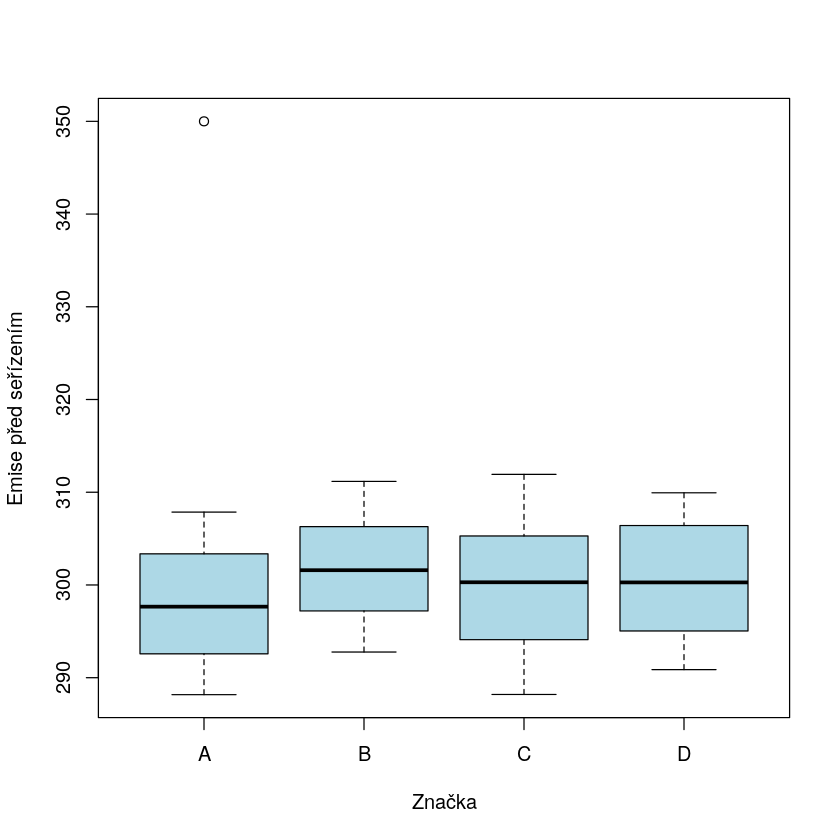

In [2]:
library(readxl)
library(dplyr)
library(ggplot2)
library(rstatix)
library(tidyr)

# Load the data
data <- read_excel("data_20240624_A.xlsx")


# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$propustnost_nova)

boxplot(data$zlepseni ~ data$vyrobce, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

outliers <- data %>%
    group_by(data$vyrobce) %>%
    rstatix::identify_outliers(zlepseni)

outliers

data$zlepseni <- ifelse(data$id %in% outliers$id, NA, data$zlepseni)
data <- na.omit(data)
summry <- data %>%
    group_by(data$vyrobce) %>%
    summarise(
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry


# 4

In [3]:
A <- data$zlepseni[data$vyrobce == "A"]
B <- data$zlepseni[data$vyrobce == "B"]

### b)

In [7]:
wilcox.test(A, conf.int = TRUE)
wilcox.test(B, conf.int = TRUE)


	Wilcoxon signed rank test with continuity correction

data:  A
V = 4950, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0
95 percent confidence interval:
 300.415 302.760
sample estimates:
(pseudo)median 
       301.665 



	Wilcoxon signed rank test with continuity correction

data:  B
V = 5050, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0
95 percent confidence interval:
 296.5900 298.7699
sample estimates:
(pseudo)median 
      297.7024 


### c,d)

In [9]:

wilcox.test(A, B, var.equal = TRUE, alternative = "greater", conf.int = TRUE)


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 6786.5, p-value = 3.093e-06
alternative hypothesis: true location shift is greater than 0
95 percent confidence interval:
 2.659965      Inf
sample estimates:
difference in location 
              3.929984 


In [5]:
0.5381818 - 0.3294000

[1] 0.2087818

# 5

In [11]:
bartlett.test(zlepseni ~ odruda, data = data)


	Bartlett test of homogeneity of variances

data:  zlepseni by odruda
Bartlett's K-squared = 6.1673, df = 3, p-value = 0.1038


In [11]:
kruskal.test(zlepseni ~ vyrobce, data = data)


	Kruskal-Wallis rank sum test

data:  zlepseni by vyrobce
Kruskal-Wallis chi-squared = 20.255, df = 3, p-value = 0.0001503


In [18]:
dunn.test::dunn.test(data$zlepseni, data$vyrobce, method = "bonferroni", altp = TRUE)

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 20.2547, df = 3, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          A          B          C
---------+---------------------------------
       B |   4.418312
         |    0.0001*
         |
       C |   1.821162  -2.603700
         |     0.4115     0.0553
         |
       D |   1.499156  -2.926519  -0.322818
         |     0.8030    0.0206*     1.0000

alpha = 0.05
Reject Ho if p <= alpha
